### <span style="color:blue">2.1</span>

In [1]:
import os
import shutil
import random

src_cat_dir = 'PetImages/Cat'
src_dog_dir = 'PetImages/Dog'

base_dir = os.getcwd()

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

for subdir in ['cats', 'dogs']:
    os.mkdir(os.path.join(train_dir, subdir))
    os.mkdir(os.path.join(validation_dir, subdir))
    os.mkdir(os.path.join(test_dir, subdir))

# Split data function
def copy_images(src_dir, dst_dir, start_idx, end_idx):
    file_names = os.listdir(src_dir)[start_idx:end_idx]
    for fname in file_names:
        shutil.copy(os.path.join(src_dir, fname), os.path.join(dst_dir, fname))

# Train: 0-1400, Validation: 1400-1700, Test: 1700-2000
copy_images(src_cat_dir, os.path.join(train_dir, 'cats'), 0, 1400)
copy_images(src_cat_dir, os.path.join(validation_dir, 'cats'), 1400, 1700)
copy_images(src_cat_dir, os.path.join(test_dir, 'cats'), 1700, 2000)

copy_images(src_dog_dir, os.path.join(train_dir, 'dogs'), 0, 1400)
copy_images(src_dog_dir, os.path.join(validation_dir, 'dogs'), 1400, 1700)
copy_images(src_dog_dir, os.path.join(test_dir, 'dogs'), 1700, 2000)


### <span style="color:blue">2.2</span>

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential()

# 1st Convolution Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolution Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolution Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\naras\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit(
    train,
    epochs=20,
    validation_data=validation)


Found 2800 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/20


C:\Users\naras\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 54s 542ms/step - accuracy: 0.5593 - loss: 2.5232 - val_accuracy: 0.5617 - val_loss: 2.4682
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 241ms/step - accuracy: 0.6871 - loss: 0.6405 - val_accuracy: 0.5267 - val_loss: 1.0037
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.7403 - loss: 0.5016 - val_accuracy: 0.4933 - val_loss: 0.8772
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.8125 - loss: 0.4172 - val_accuracy: 0.5733 - val_loss: 1.0705
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.8713 - loss: 0.2901 - val_accuracy: 0.6067 - val_loss: 0.9051
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.9318 - loss: 0.1848 - val_accuracy: 0.7150 - val_loss: 0.6928
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.9539 - loss: 0.1094 - val_accuracy: 0.6867 - val_loss: 0.8579
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - accuracy: 0.9826 - loss: 0.0614 - val_accuracy: 0.700

In [4]:
val_loss, val_accuracy = model.evaluate(validation, steps=validation.samples // validation.batch_size)
print("\nBasic CNN - Validation Set Performance:")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7479 - loss: 1.3844

Basic CNN - Validation Set Performance:
Validation Accuracy: 0.7448
Validation Loss: 1.4648


### <span style="color:Blue">2.3</span>

In [5]:
augmented_model = models.Sequential()

# 1st Convolution Layer
augmented_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
augmented_model.add(layers.BatchNormalization())
augmented_model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolution Layer
augmented_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
augmented_model.add(layers.BatchNormalization())
augmented_model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolution Layer
augmented_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
augmented_model.add(layers.BatchNormalization())
augmented_model.add(layers.MaxPooling2D((2, 2)))

# Flatten and Dense Layers
augmented_model.add(layers.Flatten())
augmented_model.add(layers.Dense(128, activation='relu'))
augmented_model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification: dog or cat


augmented_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

augmented_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
train_datagen_aug = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_augmented = train_datagen_aug.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


augmented_history = augmented_model.fit(
    train_augmented,
    epochs=20,
    validation_data=validation)

Found 2800 images belonging to 2 classes.
Epoch 1/20


C:\Users\naras\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - accuracy: 0.5562 - loss: 2.8174 - val_accuracy: 0.5000 - val_loss: 2.0245
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.5692 - loss: 0.6714 - val_accuracy: 0.5517 - val_loss: 1.7904
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 30s 326ms/step - accuracy: 0.6397 - loss: 0.6308 - val_accuracy: 0.5317 - val_loss: 0.9570
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.6682 - loss: 0.6152 - val_accuracy: 0.5333 - val_loss: 0.9436
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 32s 344ms/step - accuracy: 0.7020 - loss: 0.5756 - val_accuracy: 0.6250 - val_loss: 0.7091
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 30s 325ms/step - accuracy: 0.6725 - loss: 0.6045 - val_accuracy: 0.6367 - val_loss: 0.7171
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 31s 336ms/step - accuracy: 0.6919 - loss: 0.5733 - val_accuracy: 0.7283 - val_loss: 0.5492
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 31s 338ms/step - accuracy: 0.7221 - loss: 0.5497 - val_accuracy: 0.683

In [7]:
val_loss, val_accuracy = augmented_model.evaluate(validation, steps=validation.samples // validation.batch_size)
print("\nCNN Model with Data Augmentation - Validation Set Performance:")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5822 - loss: 0.7346

CNN Model with Data Augmentation - Validation Set Performance:
Validation Accuracy: 0.6233
Validation Loss: 0.6842


### <span style="color:Blue">2.4</span>

In [8]:
from tensorflow.keras.applications import VGG16
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

conv_base.trainable = False

vgg16_model = Sequential()
vgg16_model.add(conv_base)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(256, activation='relu'))
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(1, activation='sigmoid'))

vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_VGG16 = vgg16_model.fit(
    train,
    epochs=20,
    validation_data=validation)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 67s 739ms/step - accuracy: 0.7549 - loss: 0.5326 - val_accuracy: 0.9133 - val_loss: 0.2411
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 66s 746ms/step - accuracy: 0.8914 - loss: 0.2498 - val_accuracy: 0.8750 - val_loss: 0.2618
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 68s 771ms/step - accuracy: 0.9109 - loss: 0.2009 - val_accuracy: 0.8750 - val_loss: 0.2672
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 68s 768ms/step - accuracy: 0.9374 - loss: 0.1566 - val_accuracy: 0.9133 - val_loss: 0.2292
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 69s 775ms/step - accuracy: 0.9498 - loss: 0.1321 - val_accuracy: 0.9250 - val_loss: 0.2225
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 68s 767ms/step - accuracy: 0.9460 - loss: 0.1213 - val_accuracy: 0.9283 - val_loss: 0.2332
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 72s 813ms/step - accuracy: 0.9462 - loss: 0.1260 - val_accuracy: 0.9250 - val_loss: 0.2373
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 68s 773ms/step - accuracy: 0.9659 - loss: 0.0915 - val_accu

In [9]:
val_loss, val_accuracy = vgg16_model.evaluate(validation, steps=validation.samples // validation.batch_size)
print("\nVGG16 Transfer Learning Model - Validation Set Performance:")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 835ms/step - accuracy: 0.9215 - loss: 0.3752

VGG16 Transfer Learning Model - Validation Set Performance:
Validation Accuracy: 0.9167
Validation Loss: 0.3254


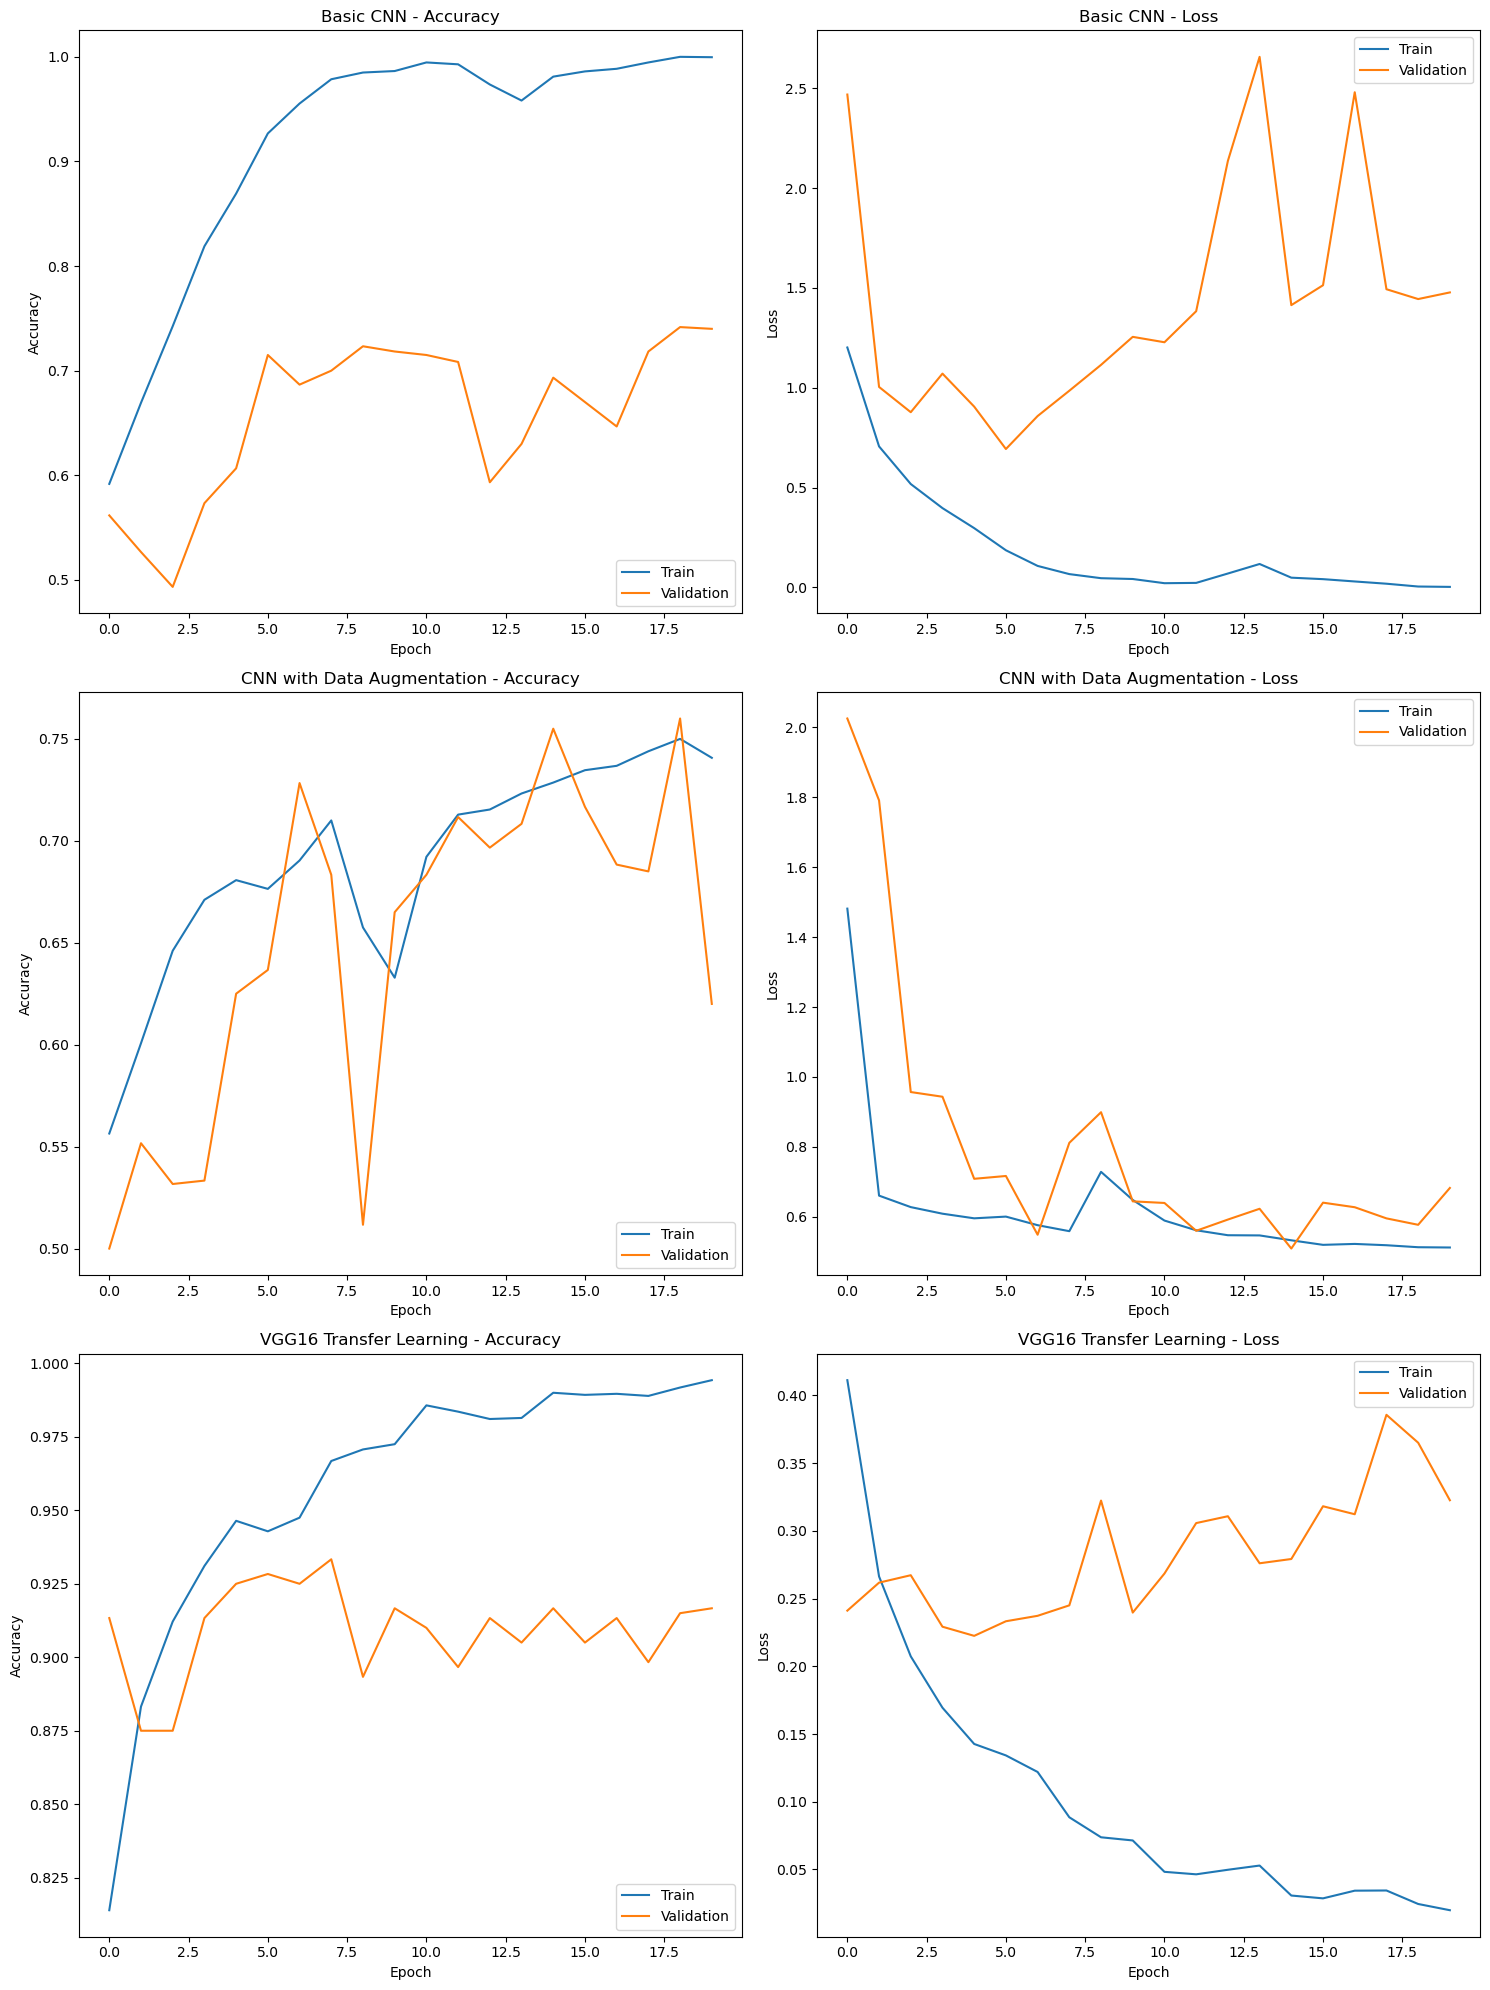


Basic CNN:
Final training accuracy: 0.9996
Final validation accuracy: 0.7400
Final training loss: 0.0022
Final validation loss: 1.4771

CNN with Data Augmentation:
Final training accuracy: 0.7407
Final validation accuracy: 0.6200
Final training loss: 0.5127
Final validation loss: 0.6829

VGG16 Transfer Learning:
Final training accuracy: 0.9943
Final validation accuracy: 0.9167
Final training loss: 0.0199
Final validation loss: 0.3226


In [10]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history, augmented_history, vgg16_history):
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    
    models = [
        ("Basic CNN", history, 0),
        ("CNN with Data Augmentation", augmented_history, 1),
        ("VGG16 Transfer Learning", vgg16_history, 2)
    ]
    
    for model_name, hist, i in models:
        # Accuracy
        axs[i, 0].plot(hist.history['accuracy'])
        axs[i, 0].plot(hist.history['val_accuracy'])
        axs[i, 0].set_title(f'{model_name} - Accuracy')
        axs[i, 0].set_ylabel('Accuracy')
        axs[i, 0].set_xlabel('Epoch')
        axs[i, 0].legend(['Train', 'Validation'], loc='lower right')
        
        # Loss
        axs[i, 1].plot(hist.history['loss'])
        axs[i, 1].plot(hist.history['val_loss'])
        axs[i, 1].set_title(f'{model_name} - Loss')
        axs[i, 1].set_ylabel('Loss')
        axs[i, 1].set_xlabel('Epoch')
        axs[i, 1].legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()

plot_accuracy_and_loss(history, augmented_history, history_VGG16)

models = [
    ("Basic CNN", history),
    ("CNN with Data Augmentation", augmented_history),
    ("VGG16 Transfer Learning", history_VGG16)
]

for model_name, hist in models:
    print(f"\n{model_name}:")
    print(f"Final training accuracy: {hist.history['accuracy'][-1]:.4f}")
    print(f"Final validation accuracy: {hist.history['val_accuracy'][-1]:.4f}")
    print(f"Final training loss: {hist.history['loss'][-1]:.4f}")
    print(f"Final validation loss: {hist.history['val_loss'][-1]:.4f}")

### <span style="color:Blue">2.5</span>

Final Evaluation on Test Set:
Found 600 images belonging to 2 classes.
 1/18 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.8750 - loss: 0.7414

C:\Users\naras\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 922ms/step - accuracy: 0.7755 - loss: 1.2454

Basic CNN:
Test Accuracy: 0.7535
Test Loss: 1.3326
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6557 - loss: 0.7118

CNN with Data Augmentation:
Test Accuracy: 0.6545
Test Loss: 0.7041
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 656ms/step - accuracy: 0.8878 - loss: 0.4117

VGG16 Transfer Learning:
Test Accuracy: 0.8872
Test Loss: 0.4367

Model Comparison on Test Set:
Basic CNN:
  Test Accuracy: 0.7535
  Test Loss: 1.3326
CNN with Data Augmentation:
  Test Accuracy: 0.6545
  Test Loss: 0.7041
VGG16 Transfer Learning:
  Test Accuracy: 0.8872
  Test Loss: 0.4367

Best performing model on test set: VGG16 Transfer Learning
Best test accuracy: 0.8872


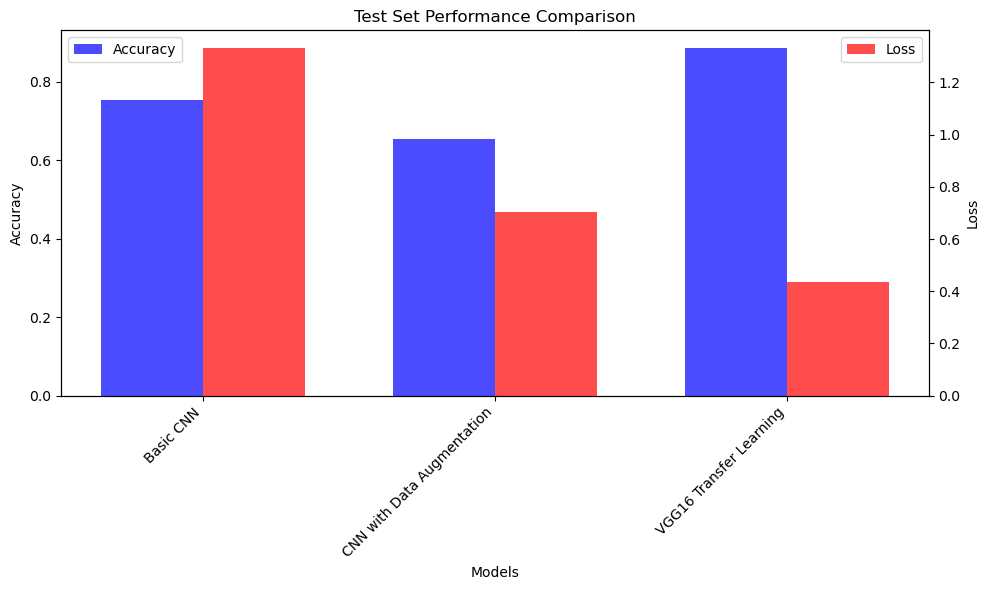

In [11]:
print("Final Evaluation on Test Set:")

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

def evaluate_on_test_set(model, test_generator):
    test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
    return test_loss, test_accuracy

cnn_test_loss, cnn_test_accuracy = evaluate_on_test_set(model, test_generator)
print("\nBasic CNN:")
print(f"Test Accuracy: {cnn_test_accuracy:.4f}")
print(f"Test Loss: {cnn_test_loss:.4f}")

augmented_test_loss, augmented_test_accuracy = evaluate_on_test_set(augmented_model, test_generator)
print("\nCNN with Data Augmentation:")
print(f"Test Accuracy: {augmented_test_accuracy:.4f}")
print(f"Test Loss: {augmented_test_loss:.4f}")

vgg16_test_loss, vgg16_test_accuracy = evaluate_on_test_set(vgg16_model, test_generator)
print("\nVGG16 Transfer Learning:")
print(f"Test Accuracy: {vgg16_test_accuracy:.4f}")
print(f"Test Loss: {vgg16_test_loss:.4f}")

# Comparison of models
models = [
    ("Basic CNN", cnn_test_accuracy, cnn_test_loss),
    ("CNN with Data Augmentation", augmented_test_accuracy, augmented_test_loss),
    ("VGG16 Transfer Learning", vgg16_test_accuracy, vgg16_test_loss)
]

print("\nModel Comparison on Test Set:")
for model_name, accuracy, loss in models:
    print(f"{model_name}:")
    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Test Loss: {loss:.4f}")

# Determine the best model
best_model = max(models, key=lambda x: x[1])
print(f"\nBest performing model on test set: {best_model[0]}")
print(f"Best test accuracy: {best_model[1]:.4f}")

def plot_test_performance(models):
    names = [model[0] for model in models]
    accuracies = [model[1] for model in models]
    losses = [model[2] for model in models]

    x = range(len(names))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    rects1 = ax1.bar([i - width/2 for i in x], accuracies, width, label='Accuracy', color='b', alpha=0.7)
    rects2 = ax2.bar([i + width/2 for i in x], losses, width, label='Loss', color='r', alpha=0.7)

    ax1.set_xlabel('Models')
    ax1.set_ylabel('Accuracy')
    ax2.set_ylabel('Loss')
    ax1.set_title('Test Set Performance Comparison')
    ax1.set_xticks(x)
    ax1.set_xticklabels(names, rotation=45, ha='right')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.show()

plot_test_performance(models)